<a href="https://colab.research.google.com/github/aryanmasih/Netflix-Content-Strategy-Analysis/blob/main/Netflix_Content_Strategy_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Content Strategy Analysis**

# Defining the Objectives

Main Objective:

Analyze how content type, release timing (season/day), and language influence Netflix's viewership strategy.

Sub-Objectives:

Identify the most frequent content types (e.g., movies vs TV shows).

Analyze release trends by day of the week and season.

Understand the role of language in content distribution.

Provide insights on how Netflix might optimize releases for maximum engagement.

# Loading and Understanding the Dataset

In [ ]:
# Import libraries
import pandas as pd


In [ ]:
# Load the dataset
file_path = 'netflix_content_2023.csv'
df = pd.read_csv(file_path)

In [ ]:
# Basic info about the dataset
print(" Dataset Information:")
print(df.info())

 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB
None


In [ ]:
# Preview first 5 rows
print("\n First 5 Rows:")
print(df.head())


 First 5 Rows:
                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  
0  81,21,00,000            English         Show  
1  66,51,00,000            English         Show  
2  62,28,00,000             Korean         Show  
3  50,77,00,000            English         Show  
4  50,30,00,000            English        Movie  


In [ ]:
# Check for missing values
print("\n❗ Missing Values per Column:")
print(df.isnull().sum())


❗ Missing Values per Column:
Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64


In [ ]:
# Check for unique values per column
print("\n Unique Values per Column:")
print(df.nunique())



 Unique Values per Column:
Title                  19158
Available Globally?        2
Release Date            1783
Hours Viewed             889
Language Indicator         6
Content Type               2
dtype: int64


# Data cleaning process

In [ ]:
# 1. Drop duplicate rows if any
df = df.drop_duplicates()

In [ ]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

In [ ]:
# 2. Rename columns for clarity (optional but recommended)
df.rename(columns={
    'Available Globally?': 'Available_Globally',
    'Release Date': 'Release_Date',
    'Hours Viewed': 'Hours_Viewed',
    'Content Type': 'Content',
    'Language Indicator': 'Language'
}, inplace=True)
df.columns

Index(['Title', 'Available_Globally', 'Release_Date', 'Hours_Viewed',
       'Language', 'Content'],
      dtype='object')

In [ ]:
# 3. Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Date']

,Release_Date
0,2023-03-23
1,2023-01-05
2,2022-12-30
3,2022-11-23
4,2023-05-04
...,...
24798,NaT
24799,NaT
24800,NaT
24804,2020-01-26


In [ ]:
# 4. Clean and convert Hours_Viewed
df['Hours_Viewed'] = df['Hours_Viewed'].astype(str).str.replace(',', '', regex=False).astype('int64')
df['Hours_Viewed']

,Hours_Viewed
0,812100000
1,665100000
2,622800000
3,507700000
4,503000000
...,...
24798,100000
24799,100000
24800,100000
24804,100000


In [ ]:
# 5. Standardize categorical fields
df['Content'] = df['Content'].str.strip().str.title()
df['Language'] = df['Language'].str.strip().str.title()

In [ ]:
# 6. Extract release day and season
df['Release_Day'] = df['Release_Date'].dt.day_name()
df['Release_Season'] = df['Release_Date'].dt.month % 12 // 3
season_map = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Fall'}
df['Release_Season'] = df['Release_Season'].map(season_map)

In [ ]:
# 7. Check cleaned data
print(df.head())

                                 Title Available_Globally Release_Date  \
0            The Night Agent: Season 1                Yes   2023-03-23   
1            Ginny & Georgia: Season 2                Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                Yes   2022-12-30   
3                  Wednesday: Season 1                Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                Yes   2023-05-04   

   Hours_Viewed Language Content Content_Type Release_Day Release_Season  
0     812100000  English    Show         Show    Thursday         Spring  
1     665100000  English    Show         Show    Thursday         Winter  
2     622800000   Korean    Show         Show      Friday         Winter  
3     507700000  English    Show         Show   Wednesday           Fall  
4     503000000  English   Movie        Movie    Thursday         Spring  


# Exploratory Data Analysis (EDA) and Visualization

1️⃣ Content Type Distribution

/tmp/ipython-input-2260076832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content', palette='Set1')


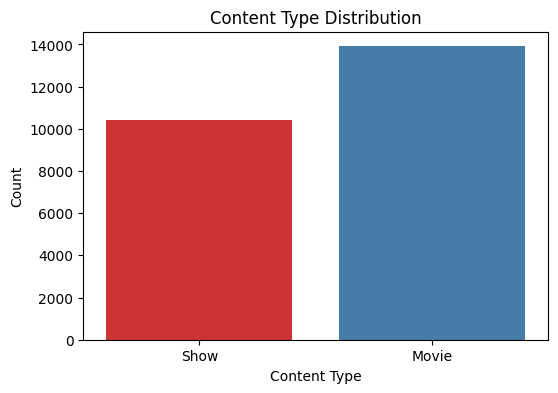

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Content Type Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Content', palette='Set1')
plt.title('Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


2️⃣ Language Distribution (Top 10 Languages)

/tmp/ipython-input-1494447943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_languages.values, x=top_languages.index, palette='viridis')


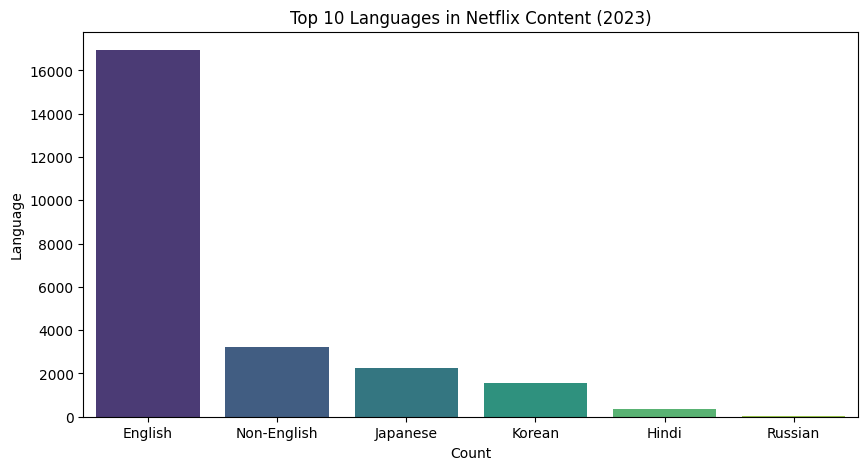

In [ ]:
top_languages = df['Language'].value_counts().head(7)

plt.figure(figsize=(10,5))
sns.barplot(y=top_languages.values, x=top_languages.index, palette='viridis')
plt.title('Top 10 Languages in Netflix Content (2023)')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


3️⃣ Content Released by Season

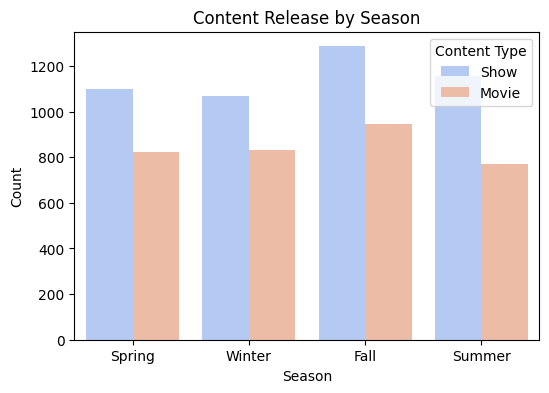

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Release_Season', hue='Content', palette='coolwarm')
plt.title('Content Release by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()


4️⃣ Content Released by Day of the Week

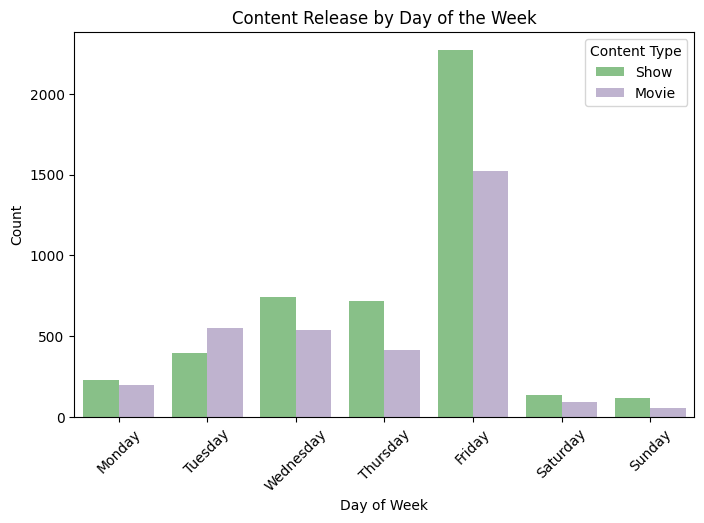

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Release_Day', order=day_order, hue='Content', palette='Accent')
plt.title('Content Release by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()


5️⃣ Top 10 Most Viewed Titles

/tmp/ipython-input-1287093063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_titles['Title'], x=top_titles['Hours_Viewed'], palette='magma')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (

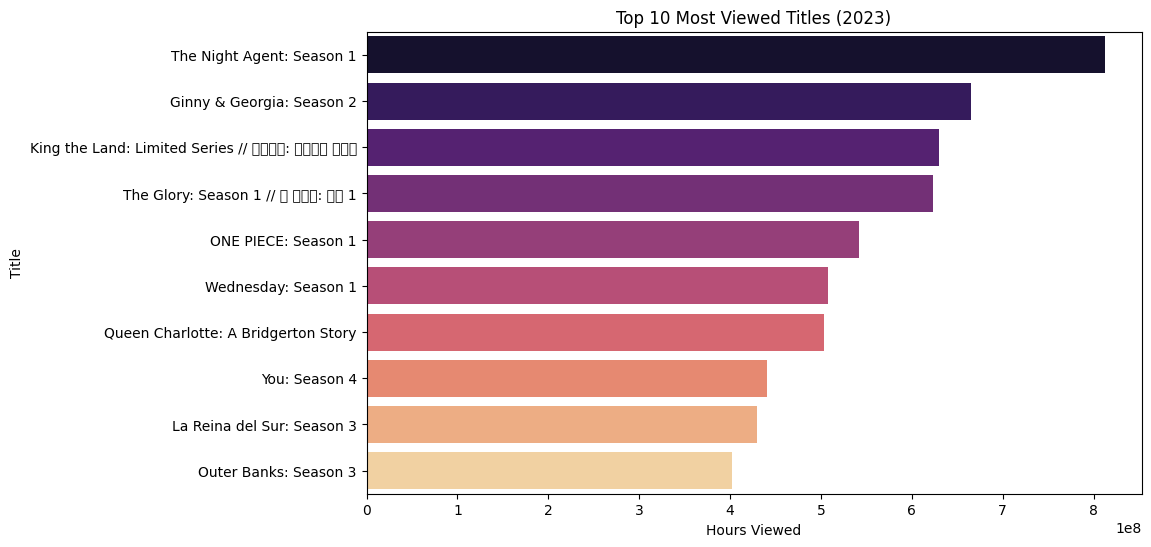

In [ ]:
top_titles = df.sort_values('Hours_Viewed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_titles['Title'], x=top_titles['Hours_Viewed'], palette='magma')
plt.title('Top 10 Most Viewed Titles (2023)')
plt.xlabel('Hours Viewed')
plt.ylabel('Title')
plt.show()


#  Insights & Recommendations

In [ ]:
from IPython.display import display, Markdown

# --- Step 1: Key Insights ---

insights = [
    "**Content Type Focus**: Shows dominate over movies, suggesting Netflix leverages episodic content for sustained engagement.",
    "**Release Timing**: Fridays and Thursdays are the most frequent release days, aligned with weekend viewer peaks.",
    "**Seasonality**: Winter and Spring see more content drops, potentially targeting holidays and school breaks.",
    "**Language Strategy**: English is most common, but non-English titles (e.g., Korean, Spanish) also show strong presence.",
    "**High Engagement Titles**: Top viewed titles often come from franchises or high-recognition series."
]

# --- Step 2: Strategic Recommendations ---

recommendations = [
    "**Content Type**: Double down on successful series and consider follow-ups or spin-offs for high-engagement shows.",
    "**Release Day Strategy**: Continue leveraging Thursday/Friday releases; test mid-week launches for regional optimization.",
    "**Seasonal Strategy**: Concentrate big releases around Winter, Spring, and holidays to maximize binge potential.",
    "**Language Expansion**: Localize content through dubbing/subtitles and promote culturally resonant regional content.",
    "**Marketing**: Enhance campaign planning around known IPs using teaser strategies and post-launch promotions."
]

# --- Display Output in Markdown Format ---

display(Markdown("## 🔍 Key Insights"))
for insight in insights:
    display(Markdown(f"- {insight}"))

display(Markdown("## 💡 Strategic Recommendations"))
for rec in recommendations:
    display(Markdown(f"- {rec}"))


## 🔍 Key Insights

- **Content Type Focus**: Shows dominate over movies, suggesting Netflix leverages episodic content for sustained engagement.

- **Release Timing**: Fridays and Thursdays are the most frequent release days, aligned with weekend viewer peaks.

- **Seasonality**: Winter and Spring see more content drops, potentially targeting holidays and school breaks.

- **Language Strategy**: English is most common, but non-English titles (e.g., Korean, Spanish) also show strong presence.

- **High Engagement Titles**: Top viewed titles often come from franchises or high-recognition series.

## 💡 Strategic Recommendations

- **Content Type**: Double down on successful series and consider follow-ups or spin-offs for high-engagement shows.

- **Release Day Strategy**: Continue leveraging Thursday/Friday releases; test mid-week launches for regional optimization.

- **Seasonal Strategy**: Concentrate big releases around Winter, Spring, and holidays to maximize binge potential.

- **Language Expansion**: Localize content through dubbing/subtitles and promote culturally resonant regional content.

- **Marketing**: Enhance campaign planning around known IPs using teaser strategies and post-launch promotions.